<a href="https://colab.research.google.com/github/pedronatanaelfs/Modelo-de-Regress-o-para-Marketing/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Building a Regression Model for Marketing

A company is investing monthly in online advertising platforms, such as YouTube, Facebook, and newspapers, for lead generation (individuals interested in their products). To monitor the performance of these investments, the company records all advertising expenses and sales returns generated from these investments. In order to better understand the relationship between the variables present in these records and identify the factors that most impact lead generation, the company has requested the analysis of a data specialist. Additionally, the company aims to create a predictive model to estimate the sales return that can be generated from a specific advertising investment.

# 1. Importing Data

The database was provided in CSV format, and we will import it using the Pandas library. First, let's import the necessary libraries:


In [8]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

Now, let's import the dataset:

In [9]:
# Importing the dataset using the .read_csv method from pandas and storing it in the "mkt_sales" variable

mkt_sales = pd.read_csv('MKT.csv')

# 2. Descriptive Analysis
Let's analyze the data we have:

In [10]:
# Analyzing the columns and the first rows
mkt_sales.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


We have 4 columns: youtube, facebook, newspaper, and sales.

In [11]:
# Let's check for null data and the data type of each column
mkt_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


All are in float64 format and appear to be well-filled without requiring correction.


In [12]:
# Analyzing the data statistics:
mkt_sales.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Here are the minimum, maximum, standard deviation, and mean values.

We can also analyze these values graphically:

Let's check if the values are acceptable, if there is nothing negative or significantly outside reality:


In [13]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("YouTube","Facebook", "Newspaper"))

fig.add_trace(go.Histogram(x=mkt_sales['youtube']),
              row=1, col=1)
fig.add_trace(go.Histogram(x=mkt_sales['facebook']),
              row=1, col=2)
fig.add_trace(go.Histogram(x=mkt_sales['newspaper']),
              row=1, col=3)

fig.update_layout(showlegend=False)

Now, let's move on to the next step.

# 3. Exploratory Analysis

Let's analyze the relationships between variables and sales to discover relevant patterns:

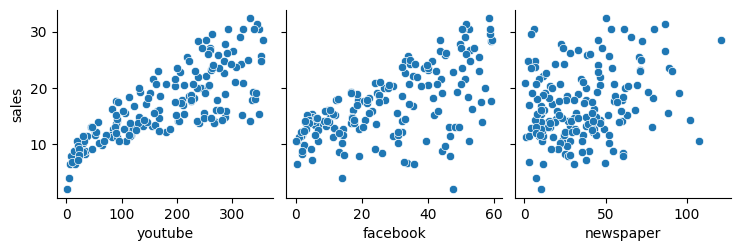

In [14]:
sns.pairplot(mkt_sales, x_vars = ['youtube','facebook','newspaper'], y_vars = 'sales');

We can see that the 'youtube' variable has a more pronounced linearity.

Let's verify the correlations using a heatmap:

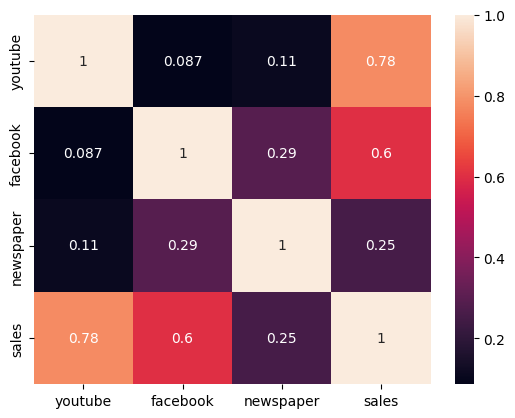

In [15]:
sns.heatmap(mkt_sales.corr(), annot = True);

We notice that YouTube has a stronger correlation than Facebook and newspaper.

# 3. Modeling

Let's use some regression functions for this case, testing which one performs better:

1. SKLearn Linear Regression
<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression>

2. SKLearn Support Vector Regression <https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html>

Modeling Assumptions:

Only numeric variables


Let's separate our independent(X) and dependent(y) variables to use machine learning algorithms.


In [16]:
X = mkt_sales[['youtube', 'facebook', 'newspaper']]

y = mkt_sales[['sales']]

We'll split our training and testing scope with 20% for testing using the SKLearn method.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Evaluation Metric:

We will use the r² metric to determine the best method to be used, where the closer the r² value is to 1, the better the model will be. <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html>

# Technique 1. Linear Regression

In [18]:
# Training the model
regLinear = LinearRegression().fit(X_train, y_train)

# Testing the model
yPredLinear = regLinear.predict(X_test)

# Calculating the r² error
r2Linear = r2_score(y_test, yPredLinear)

# Displaying results
print('r2Linear: ',r2Linear)

r2Linear:  0.872863085701216


# Technique 2. Support Vector Regression

In [19]:
# Training the model
regSVR = SVR().fit(X_train, y_train)

# Testing the model
yPredSVR = regSVR.predict(X_test)

# Calculating the r² error
r2SVR = r2_score(y_test, yPredSVR)

# Displaying results
print('r2Linear: ',r2SVR)

r2Linear:  0.8188712168501214


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



From the r² results, we see that the Linear Regression technique brought a better result. Let's now optimize the hyperparameters using the GridSearchCV method from SKLearn <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV>

In [20]:
# Displaying the parameters
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [21]:
# Introducing the parameters to be tested
parameters = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}

# Setting up the GridSearchCV
LinearGrid = GridSearchCV(LinearRegression(), parameters, refit = 'r2', verbose = True)

# Passing the training data
LinearGridModel = LinearGrid.fit(X_train, y_train)

# Displaying the best parameters
LinearGridModel.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'fit_intercept': True, 'positive': True}

In this way, only the 'positive' parameter was changed to True to achieve a better result.

In [22]:
# Testing the model
yLGM = LinearGridModel.predict(X_test)

# Calculating the r² error
r2LGM = r2_score(y_test, yLGM)

# Displaying results
print('r2LGM: ',r2LGM)

r2LGM:  0.8728894133434413


# 4. Calculating Prediction

In [23]:
# Enter the investment values in YouTube, Facebook, and Newspaper to get a sales forecast:

Youtube = 250.50
Facebook = 50.0
NewsPaper = 40.0

array_invest = np.array([['','youtube','facebook','newspaper'],
                ['Row1',Youtube,Facebook,NewsPaper]])

investiment = pd.DataFrame(data=array_invest[1:,1:],
                  index=[1],
                  columns=['youtube','facebook','newspaper'])

previsto = float(LinearGridModel.predict(investiment))

print(f"With ${Youtube:.2f} invested in YouTube, ${Facebook:.2f} invested in Facebook, and ${NewsPaper:.2f} in NewsPaper, an estimated return of ${previsto:.2f} is expected")

With $250.50 invested in YouTube, $50.00 invested in Facebook, and $40.00 in NewsPaper, an estimated return of $24.49 is expected
